In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import datetime
import numpy as np

In [47]:
import pandas as pd

train = pd.read_excel("/content/drive/MyDrive/ufo_hack/train.xlsx")
test = pd.read_excel("/content/drive/MyDrive/ufo_hack/test.xlsx")
macro = pd.read_excel("/content/drive/MyDrive/ufo_hack/Макропоказатели.xlsx")
metal = pd.read_excel("/content/drive/MyDrive/ufo_hack/Показатели рынка металла.xlsx")
price = pd.read_excel("/content/drive/MyDrive/ufo_hack/Цены на сырье.xlsx")
mater = pd.read_excel("/content/drive/MyDrive/ufo_hack/Данные рынка стройматериалов.xlsx")
fuel = pd.read_excel("/content/drive/MyDrive/ufo_hack/Топливо.xlsx")
lme = pd.read_excel("/content/drive/MyDrive/ufo_hack/Индекс LME.xlsx")

In [35]:
def from_timestamp(s):
    s = str(s).split(' ')[0]
    return int(s.split('-')[0]) * 365 + int(s.split('-')[1]) * 30 + int(s.split('-')[2])

In [36]:
dts = list(train.dt) + list(test.dt)

days_dts = []
for d in dts:
    days_dts.append(from_timestamp(d))

In [37]:
def check_nan(row, data):

    for key, value in row.items():
        if value == np.nan:
            value = data[key].mean()

        row[key] = value

    return row

In [38]:
def fill_nan(row):
    for key, _ in row.items():
        row[key] = np.nan
    return row

In [48]:
dfs = [macro, metal, price, mater, fuel]

for df in dfs:
    new_df = df.iloc[:1]

    if from_timestamp(df['dt'].iloc[0]) > days_dts[0]:
        print(from_timestamp(new_df['dt'].iloc[0]), days_dts[0])
        new_df.iloc[0] = fill_nan(new_df.iloc[0])

    new_df['dt'].iloc[0] = dts[0]

    ind = 0

    for i in range(1, len(dts)):
        if days_dts[i] < from_timestamp(df['dt'].iloc[ind]):
            new_df = new_df.append(check_nan(df.iloc[ind-1], new_df))

        else:
            while days_dts[i] > from_timestamp(df['dt'].iloc[ind]):
                ind += 1
            new_df = new_df.append(check_nan(df.iloc[ind-1], new_df))

        if from_timestamp(new_df['dt'].iloc[-1]) > days_dts[i]:
            print('leak')
            break

        new_df['dt'].iloc[-1] = dts[i]

    print(new_df)

    train = new_df.merge(train, on=['dt'])
    test = new_df.merge(test, on=['dt'])

735901 735510


Выходные данные были обрезаны до нескольких последних строк (5000).

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dt'].iloc[-1] = dts[i]
<ipython-input-37-7905a0a6557d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[key] = value
<ipython-input-48-6e3040478595>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(check_nan(df.iloc[ind-1], new_df))
<ipython-input-48-6e3040478595>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

             dt  Базовый индекс потребительских цен на товары и услуги  \
0    2015-01-05                                                NaN       
0    2015-01-12                                                NaN       
0    2015-01-19                                                NaN       
0    2015-01-26                                                NaN       
0    2015-02-02                                                NaN       
...         ...                                                ...       
1567 2023-02-13                                                NaN       
1573 2023-02-20                                                NaN       
1578 2023-02-27                                                NaN       
1584 2023-03-06                                                NaN       
1590 2023-03-13                                                NaN       

      Ключевая ставка  Курс доллара  
0                 NaN           NaN  
0                 NaN           NaN

Выходные данные были обрезаны до нескольких последних строк (5000).

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dt'].iloc[-1] = dts[i]
<ipython-input-37-7905a0a6557d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[key] = value
<ipython-input-48-6e3040478595>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(check_nan(df.iloc[ind-1], new_df))
<ipython-input-48-6e3040478595>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

           dt  Производство арматуры Сортовой прокат_Арматура  \
0  2015-01-05                                             NaN   
0  2015-01-12                                           527.0   
0  2015-01-19                                           527.0   
0  2015-01-26                                           527.0   
0  2015-02-02                                           527.0   
..        ...                                             ...   
82 2023-02-13                                           616.0   
82 2023-02-20                                           616.0   
82 2023-02-27                                           616.0   
83 2023-03-06                                           699.0   
83 2023-03-13                                           699.0   

    Производство арматуры Сортовой прокат_Катанка  \
0                                             NaN   
0                                           208.0   
0                                           208.0   
0      

Выходные данные были обрезаны до нескольких последних строк (5000).

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dt'].iloc[-1] = dts[i]
<ipython-input-37-7905a0a6557d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[key] = value
<ipython-input-48-6e3040478595>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(check_nan(df.iloc[ind-1], new_df))
<ipython-input-48-6e3040478595>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

            dt  \
0   2015-01-05   
0   2015-01-12   
0   2015-01-19   
0   2015-01-26   
0   2015-02-02   
..         ...   
417 2023-02-13   
418 2023-02-20   
419 2023-02-27   
420 2023-03-06   
421 2023-03-13   

     Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС  \
0                                                  NaN                  
0                                               3850.0                  
0                                               3850.0                  
0                                               3850.0                  
0                                               3850.0                  
..                                                 ...                  
417                                             9500.0                  
418                                             9500.0                  
419                                             9500.0                  
420                                             9500.

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-48-6e3040478595>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dt'].iloc[-1] = dts[i]
<ipython-input-37-7905a0a6557d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[key] = value
<ipython-input-48-6e3040478595>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(check_nan(df.iloc[ind-1], new_df))
<ipython-input-48-6e3040478595>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

           dt  Импорт цемента ЖД  Экспорт цемента ЖД  \
0  2015-01-05                NaN                 NaN   
0  2015-01-12                NaN                 NaN   
0  2015-01-19                NaN                 NaN   
0  2015-01-26                NaN                 NaN   
0  2015-02-02                NaN                 NaN   
..        ...                ...                 ...   
21 2023-02-13          179.94821           64.602294   
21 2023-02-20          179.94821           64.602294   
21 2023-02-27          179.94821           64.602294   
22 2023-03-06          127.55719           56.712400   
22 2023-03-13          127.55719           56.712400   

    Отгрузка цемента хоппер ЖД  Отгрузка цемента остальные ЖД  \
0                          NaN                            NaN   
0                          NaN                            NaN   
0                          NaN                            NaN   
0                          NaN                            NaN   
0 

<ipython-input-48-6e3040478595>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(check_nan(df.iloc[ind-1], new_df))
<ipython-input-48-6e3040478595>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dt'].iloc[-1] = dts[i]
<ipython-input-37-7905a0a6557d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[key] = value
<ipython-input-48-6e3040478595>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df

           dt  Цена на бензин  Цена на дт
0  2015-01-05             NaN         NaN
0  2015-01-12             NaN         NaN
0  2015-01-19             NaN         NaN
0  2015-01-26             NaN         NaN
0  2015-02-02             NaN         NaN
..        ...             ...         ...
71 2023-02-13           51.65       56.73
71 2023-02-20           51.65       56.73
71 2023-02-27           51.65       56.73
72 2023-03-06           51.68       57.34
72 2023-03-13           51.68       57.34

[428 rows x 3 columns]


<ipython-input-48-6e3040478595>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dt'].iloc[-1] = dts[i]
<ipython-input-37-7905a0a6557d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[key] = value
<ipython-input-48-6e3040478595>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(check_nan(df.iloc[ind-1], new_df))
<ipython-input-48-6e3040478595>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [49]:
train

,dt,Цена на бензин,Цена на дт,Импорт цемента ЖД,Экспорт цемента ЖД,Отгрузка цемента хоппер ЖД,Отгрузка цемента остальные ЖД,Производство цемента,Импорт цемента,Экспорт цемента,...,Экспорт сырья Чугун_Всего отгружено с предприятия,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие,Базовый индекс потребительских цен на товары и услуги,Ключевая ставка,Курс доллара,Цена на арматуру
0,2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32900
1,2015-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,97.0,68.0,50.0,NaN,NaN,NaN,32500
2,2015-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,97.0,68.0,50.0,NaN,NaN,NaN,32000
3,2015-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,97.0,68.0,50.0,NaN,NaN,NaN,30700
4,2015-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,97.0,68.0,50.0,NaN,NaN,NaN,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2022-08-01,51.36,53.24,111.77292,69.38980,1541.38408,439.413221,4.5108,177.90417,79.40931,...,0.0,0.0,17.0,140.0,73.0,86.0,NaN,NaN,61.3101,47500
396,2022-08-08,51.35,53.21,114.26468,76.87777,1659.50314,451.206773,5.0128,150.20119,85.23647,...,0.0,8.0,57.0,147.0,87.0,52.0,NaN,NaN,60.3696,49000
397,2022-08-15,51.35,53.21,114.26468,76.87777,1659.50314,451.206773,5.0128,150.20119,85.23647,...,0.0,8.0,57.0,147.0,87.0,52.0,NaN,NaN,60.8993,47500
398,2022-08-22,51.35,53.21,114.26468,76.87777,1659.50314,451.206773,5.0128,150.20119,85.23647,...,0.0,8.0,57.0,147.0,87.0,52.0,NaN,NaN,59.1321,46500


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Columns: 159 entries, dt to Цена на арматуру
dtypes: datetime64[ns](1), float64(157), int64(1)
memory usage: 500.0 KB


In [51]:
columns = ['dt']

for key, value in train.corr()['Цена на арматуру'].items():
    if (value > 0.4 or value < -0.4) and train[key].isnull().sum() < 40:
        print(value, " - ", key)
        columns.append(key)

<ipython-input-51-43450cbd7f1c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for key, value in train.corr()['Цена на арматуру'].items():


0.6771029565548721  -  Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС
0.8920046646441515  -  Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т
0.9239861070010841  -  Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС
0.9183928499556288  -  Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС
0.9310421437394831  -  Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС
0.8265756737199672  -  ЖРС_Китай Iron ore fines Fe 62%, CFR
0.6894250098876626  -  Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС
0.8982693051442053  -  ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т
0.8927375743642961  -  Лом_HMS 1/2 80:20, FOB США Восток, $/т
0.899083993578057  -  Лом_3А, FOB РФ Черное море, $/т
0.8143772149230237  -  Чугун_FOB Бразилия Север, $/т
0.9084129664518522  -  Лом_HMS 1/2 80:20, CFR ЮВА, $/т
0.6865382177203023  -  Концентрат коксующегося угля_Россия марка КС FCA руб./т, без НДС
0.925704169231091  -  Лом_3А, РФ FCA ж/д респ. Татарстан, руб./т, без Н

In [52]:
train = train[columns]
test = test[columns]

In [59]:
train = train.dropna()

In [60]:
train.to_csv('/content/train_1_no_leaks_no_na.csv')
test.to_csv('/content/test_1_no_leaks_no_na.csv')

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 73 columns):
 #   Column                                                                                            Non-Null Count  Dtype         
---  ------                                                                                            --------------  -----         
 0   dt                                                                                                28 non-null     datetime64[ns]
 1   Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС                                  28 non-null     float64       
 2   Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т                                                          28 non-null     float64       
 3   Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС                                                      28 non-null     float64       
 4   Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС                                        

# Дальше просто мусор

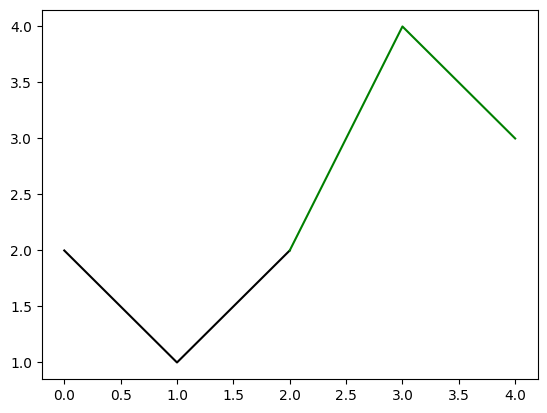

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([2, 1, 2, np.nan, np.nan])
b = np.array([np.nan, np.nan, 2, 4, 3])

plt.plot(a, color="black")
plt.plot(b, color="green")